In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Cyclegan

In [2]:
import sys
from options.train_options import TrainOptions
from options.test_options import TestOptions
from data import CreateDataLoader
from models import create_model
import time
from tqdm import tqdm
from matplotlib import pyplot as plt

In [7]:

sys.argv = [sys.argv[0]]
sys.argv.extend(['--dataroot', '/mnt/data4T1/vozman/summer2winter', '--num_threads', '8', '--no_dropout',
                 '--batch_size', '4', '--niter', '100', '--niter_decay', '100', '--name', 'nodrop', '--gpu_ids', '0'])

In [6]:
    opt = TrainOptions().parse()

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                 dataroot: /mnt/data4T1/vozman/summer2winter	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                            

In [7]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

dataset [UnalignedDataset] was created


1231

In [8]:
model = create_model(opt)
model.setup(opt)


initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
model [CycleGANModel] was created
---------- Networks initialized -------------
[Network G_A] Total number of parameters : 11.378 M
[Network G_B] Total number of parameters : 11.378 M
[Network D_A] Total number of parameters : 2.765 M
[Network D_B] Total number of parameters : 2.765 M
-----------------------------------------------


In [9]:
model.print_networks(True)

---------- Networks initialized -------------
DataParallel(
  (module): ResnetGenerator(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace)
      (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace)
      (10): ResnetBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
          (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stat

In [ ]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batch_size
        epoch_iter += opt.batch_size
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_losses()
            t = (time.time() - iter_start_time) / opt.batch_size

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save_networks('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('sasaveving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save_networks('latest')
        model.save_networks(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

308it [08:57,  2.88s/it]
0it [00:00, ?it/s]

End of epoch 1 / 200 	 Time Taken: 537 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 2 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 3 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 4 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


18it [00:31,  1.79s/it]

saving the latest model (epoch 5, total_steps 5000)


308it [08:54,  1.62s/it]


sasaveving the model at the end of epoch 5, iters 6160


0it [00:00, ?it/s]

End of epoch 5 / 200 	 Time Taken: 535 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 6 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 7 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


308it [08:55,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 8 / 200 	 Time Taken: 535 sec
learning rate = 0.0002000


36it [01:03,  1.80s/it]

saving the latest model (epoch 9, total_steps 10000)


308it [08:55,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 9 / 200 	 Time Taken: 535 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]


sasaveving the model at the end of epoch 10, iters 12320


0it [00:00, ?it/s]

End of epoch 10 / 200 	 Time Taken: 535 sec
learning rate = 0.0002000


308it [08:55,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 11 / 200 	 Time Taken: 535 sec
learning rate = 0.0002000


308it [08:59,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 12 / 200 	 Time Taken: 539 sec
learning rate = 0.0002000


54it [01:34,  1.80s/it]

saving the latest model (epoch 13, total_steps 15000)


308it [09:02,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 13 / 200 	 Time Taken: 542 sec
learning rate = 0.0002000


308it [08:54,  1.62s/it]
0it [00:00, ?it/s]

End of epoch 14 / 200 	 Time Taken: 534 sec
learning rate = 0.0002000


308it [08:56,  1.62s/it]


sasaveving the model at the end of epoch 15, iters 18480


0it [00:00, ?it/s]

End of epoch 15 / 200 	 Time Taken: 536 sec
learning rate = 0.0002000


60it [01:44,  1.74s/it]

## Test

In [49]:
sys.argv = [sys.argv[0]]
sys.argv.extend(['--dataroot', '/mnt/data4T1/vozman/summer2winter', '--num_threads', '8', '--no_dropout',
                 '--batch_size', '1', '--name', 'nodrop', '--gpu_ids', '0'])

In [51]:
    opt = TestOptions().parse()
    opt.num_threads = 1   # test code only supports num_threads = 1
    opt.batch_size = 1    # test code only supports batch_size = 1
    opt.serial_batches = True  # no shuffle
    opt.no_flip = True    # no flip
    opt.display_id = -1   # no visdom display
    data_loader = CreateDataLoader(opt)
    dataset = data_loader.load_data()
    model = create_model(opt)
    model.setup(opt)

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                 dataroot: /mnt/data4T1/vozman/summer2winter	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                 fineSize: 256                           
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                 loadSize: 256                       

In [52]:
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [53]:
def get_one(data):
    model.set_input(data)
    model.test()
    return list(model.get_current_visuals().values())

In [65]:
test_ims = []
for i,o in enumerate(dataset):
    if i>50: break
    test_ims.append(get_one(o))

In [55]:
def show_grid(ims):
    fig,axes = plt.subplots(1,2,figsize=(9,6))
    for i,ax in enumerate(axes.flat): show_img(ims[i].squeeze(0).permute(1, 2, 0), ax);
    fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


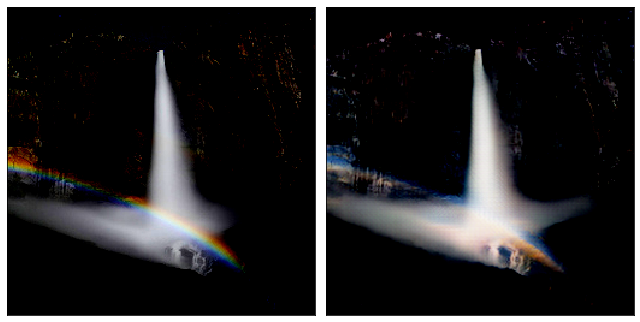

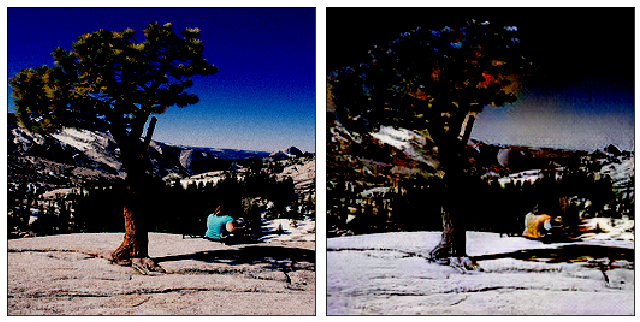

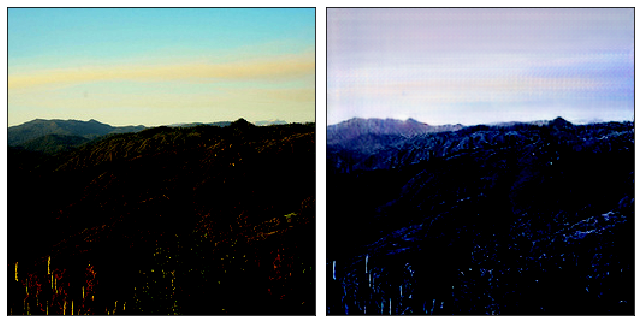

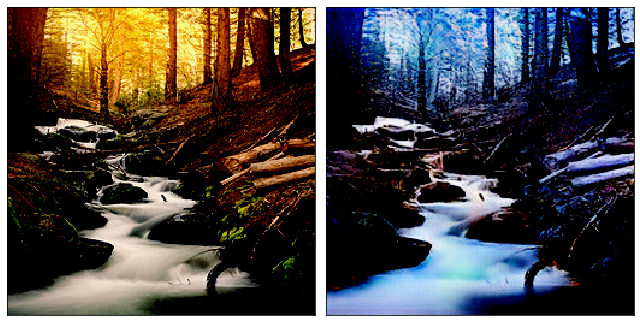

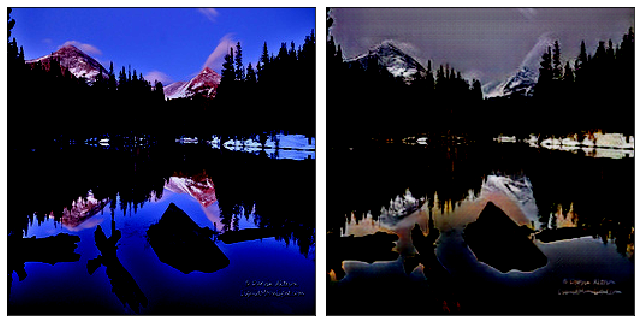

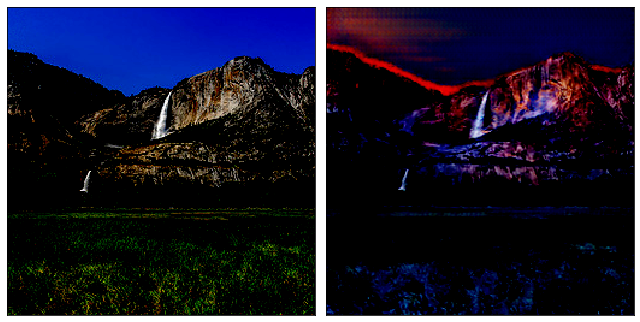

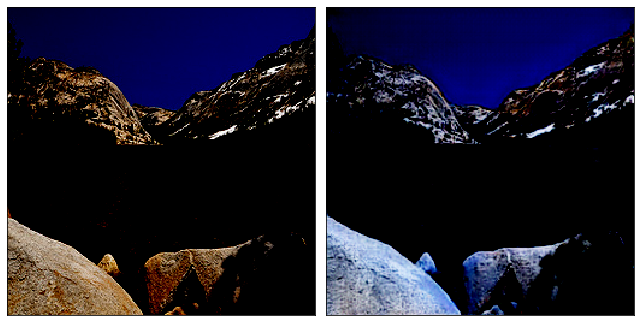

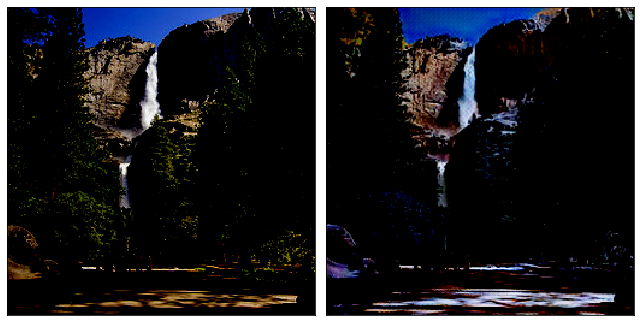

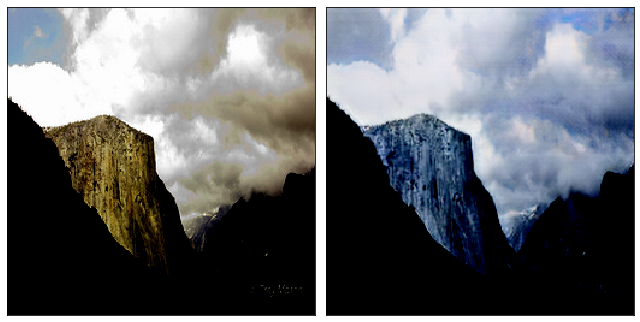

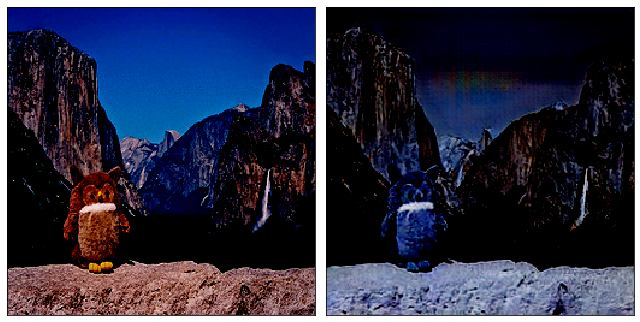

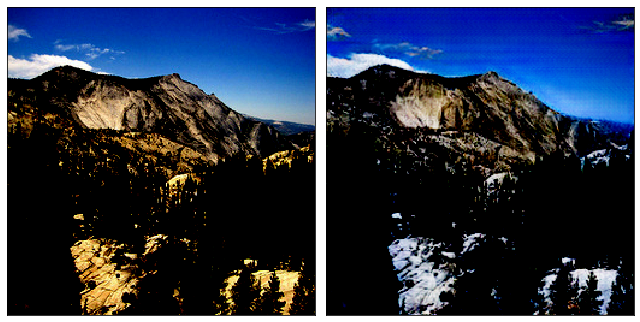

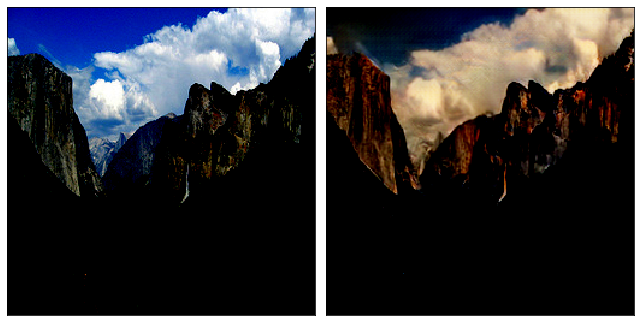

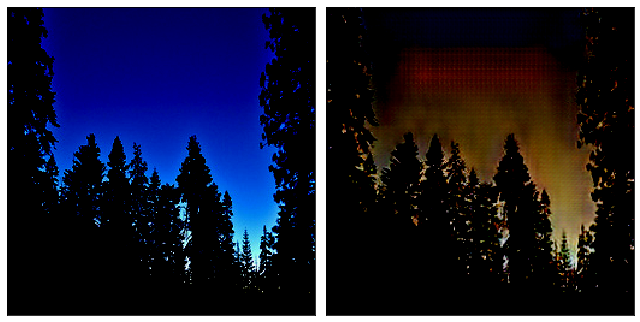

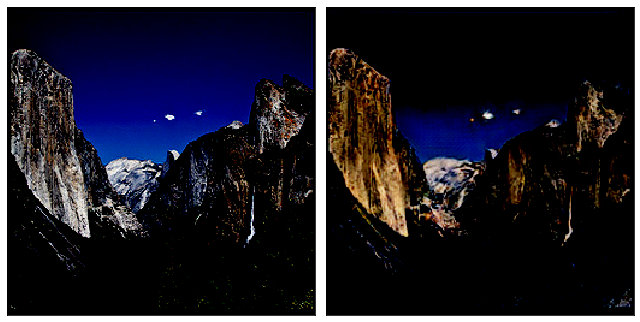

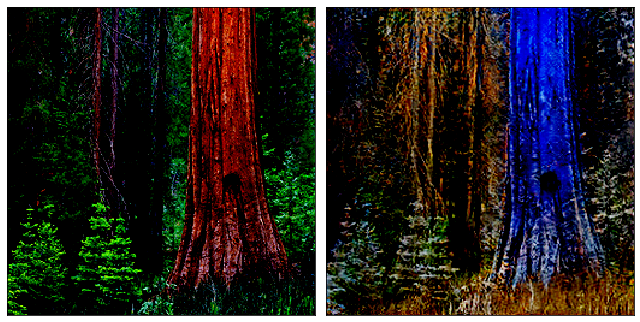

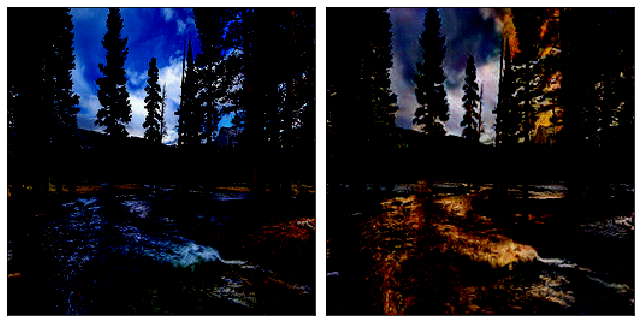

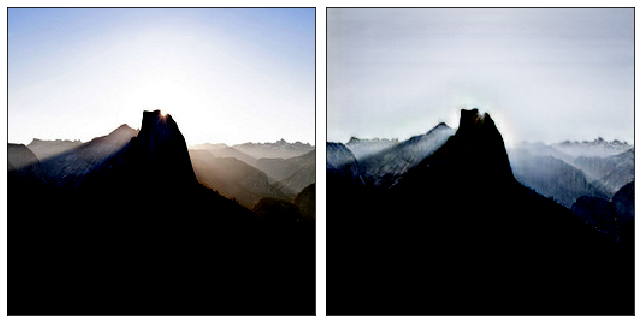

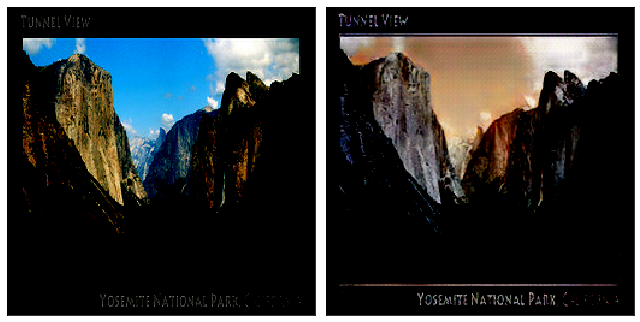

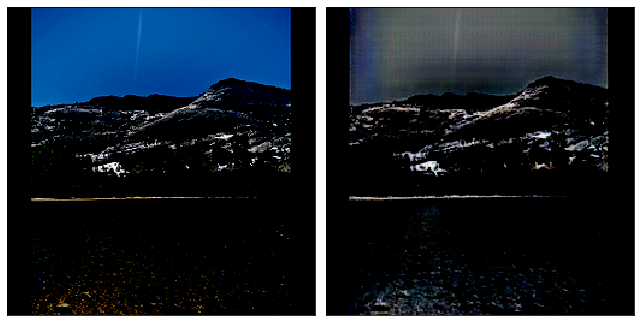

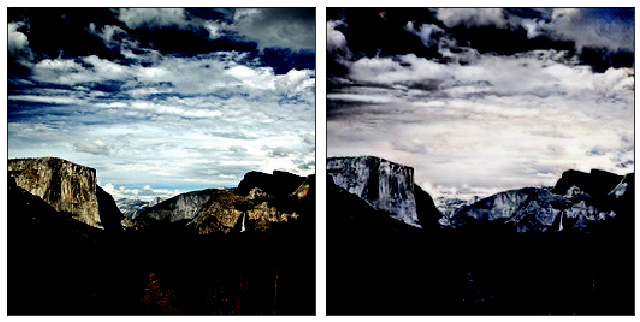

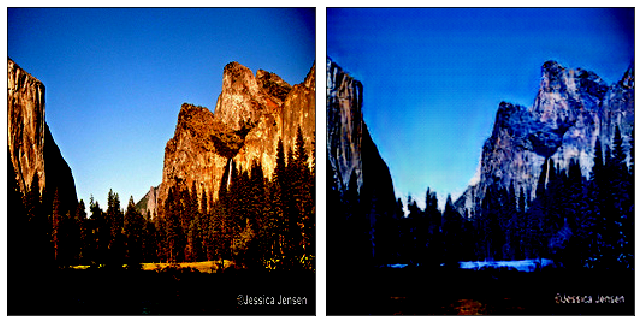

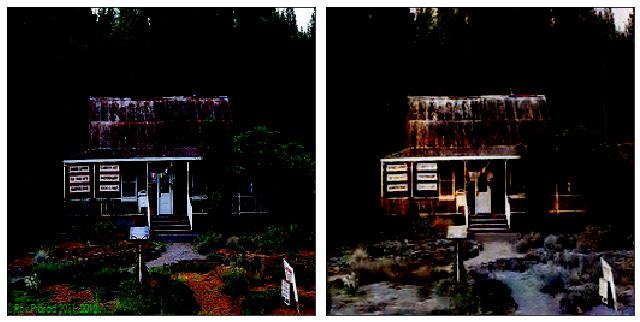

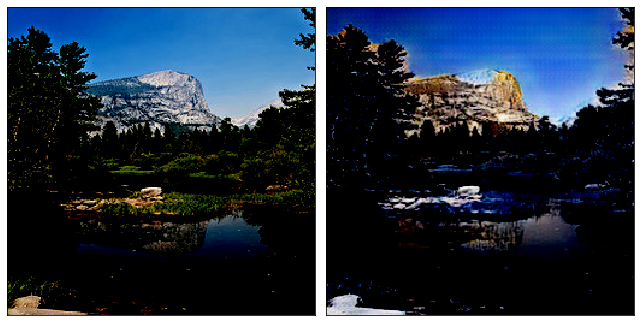

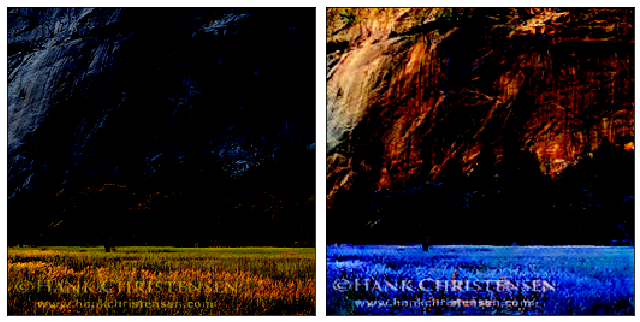

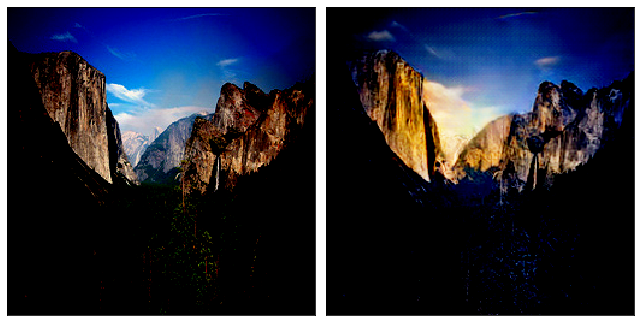

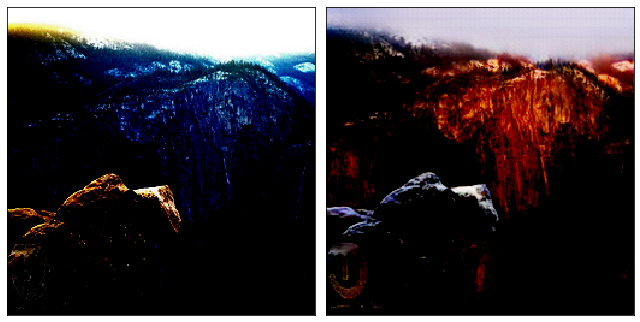

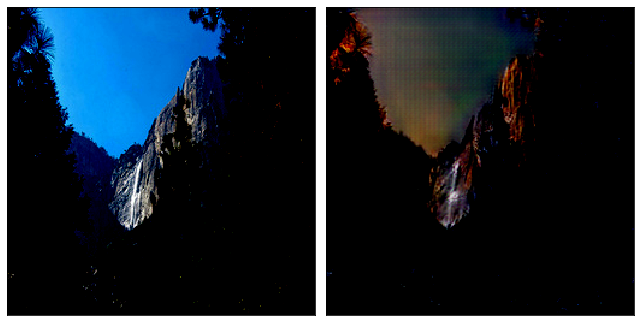

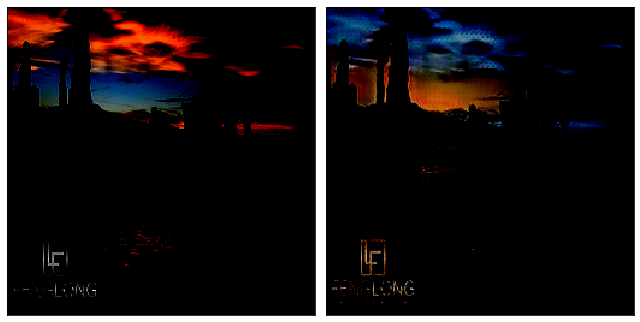

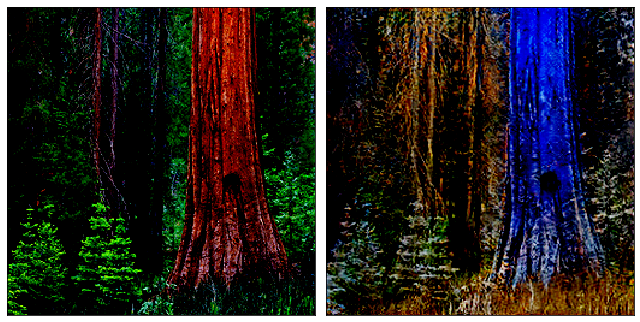

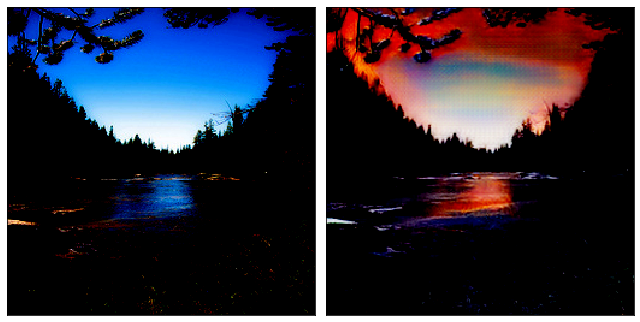

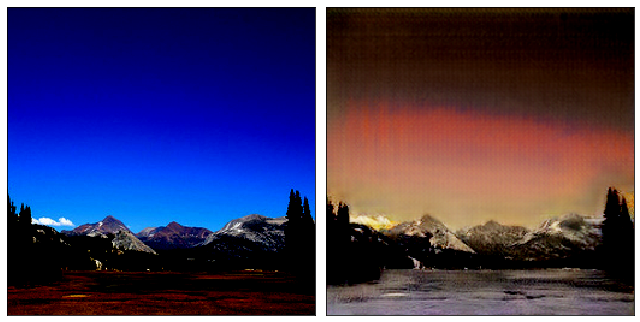

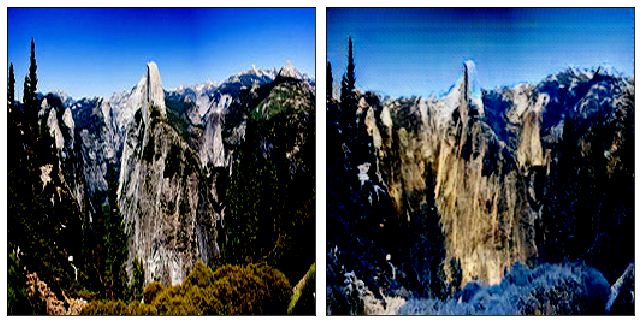

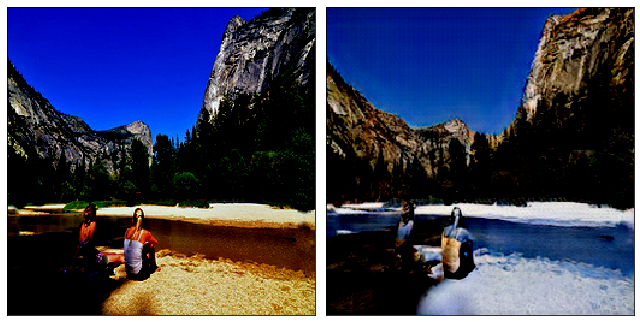

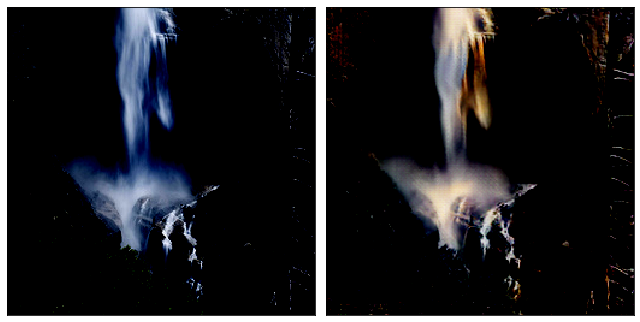

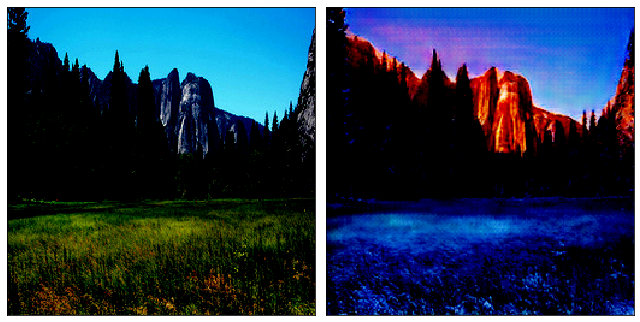

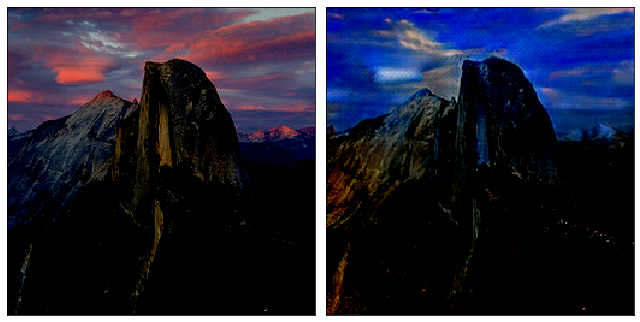

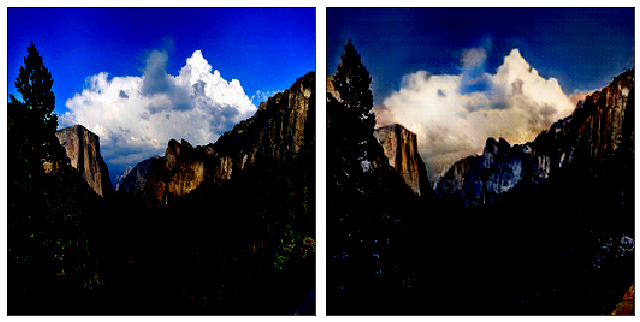

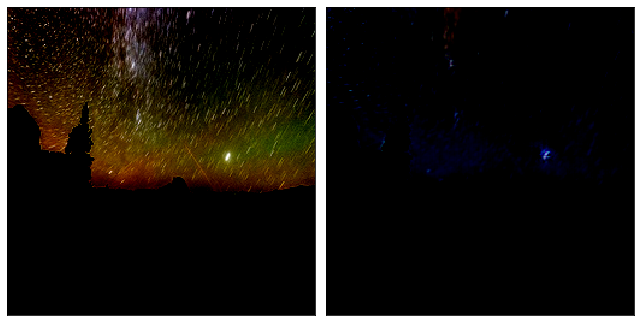

In [70]:
for img in test_ims[13:]: show_grid(img)